# Import Libraries

In [232]:
import numpy as np
import itertools as itl
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from copy import deepcopy
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras as ks
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler

# Question 1

## Part 1

In [2]:
class OneLayerMccullochPitts:
    def __init__(self, inputs, weights, thresholds):
        self.inputs = inputs
        self.weights = weights
        self.thresholds = thresholds

    def set_inputs(self, inputs):
        self.inputs = inputs
    
    def activate(self):
        activated_output = np.matmul(self.weights, self.inputs)
        return activated_output - self.thresholds

    def sign(self, x):
        if x >= 0:
            return 1
        else:
            return 0

    def calc_outputs(self):
        activated_output = self.activate()
        return np.vectorize(self.sign)(activated_output)

In [231]:
w1 = np.array([[1, -1, 1, 1, 1, 1, 1], #6
                    [1, 1, 1, -1, -1, -1, -1], #7
                    [1, 1, 1, 1, 1, 1, 1], #8
                    [1, 1, 1, 1, -1, 1, 1]]) #9

thresholds = np.array([[6],
                    [3],
                    [7],
                    [6]])

inputs_permutations = list(itl.product([0, 1], repeat=7))
matrices = [np.array(p).reshape(7, 1) for p in inputs_permutations]



network = OneLayerMccullochPitts(matrices[0], w1, thresholds)

for matrice in matrices:
    network.set_inputs(matrice)
    output = network.calc_outputs()
    if 1 in output:
        print(f'input:\n {matrice}\n output:\n {output}\n', end='----------------\n')

input:
 [[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]
 output:
 [[1]
 [0]
 [0]
 [0]]
----------------
input:
 [[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]
 output:
 [[0]
 [1]
 [0]
 [0]]
----------------
input:
 [[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]
 output:
 [[0]
 [0]
 [0]
 [1]]
----------------
input:
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
 output:
 [[0]
 [0]
 [1]
 [0]]
----------------


## Part 2

In [4]:
class TwoLayerMccullochPitts:
    def __init__(self, inputs, weights, thresholds, layers_count):
        self.inputs = inputs
        self.weights = weights
        self.thresholds = thresholds
        self.layers_count = layers_count

    def set_inputs(self, inputs):
        self.inputs = inputs

    def activate(self, inputs, layer_number):
        activated_output = np.matmul(self.weights[layer_number], inputs)
        return activated_output - self.thresholds[layer_number]

    def sign(self, x):
        if x >= 0:
            return 1
        else:
            return 0

    def calc_outputs(self):
        inputs = self.inputs

        for i in range(self.layers_count):
            output = self.activate(inputs, i)
            output = np.vectorize(self.sign)(output)
            inputs = output

        return output

In [5]:
w1 = [np.array([[1, 2, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 2, 1, 1]]),
        np.array([[-1, 1],
                [-1, -1],
                [1, 1],
                [1, -1]])]

thresholds = [np.array([[7],
                        [7]]),
                np.array([[1],
                        [0],
                        [2],
                        [1]])]


inputs = [np.array([[1, 0, 1, 1, 1, 1, 1]]), #6
        np.array([[1, 1, 1, 0, 0, 0, 0]]), #7
        np.array([[1, 1, 1, 1, 1, 1, 1]]), #8
        np.array([[1, 1, 1, 1, 0, 1, 1]])] #9

In [6]:
network = TwoLayerMccullochPitts(inputs[0].T, w1, thresholds, 2)

for inputt in inputs:
    network.set_inputs(inputt.T)
    output = network.calc_outputs()
    print(f'input:\n {inputt.T}\n output:\n {output}\n', end='----------------\n')

input:
 [[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]
 output:
 [[1]
 [0]
 [0]
 [0]]
----------------
input:
 [[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]
 output:
 [[0]
 [1]
 [0]
 [0]]
----------------
input:
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
 output:
 [[0]
 [0]
 [1]
 [0]]
----------------
input:
 [[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]
 output:
 [[0]
 [0]
 [0]
 [1]]
----------------


# Qestion 2

In [7]:
iris = datasets.load_iris()

In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

df['species_name'] = df['species'].map({0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]})

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Part 1

In [11]:
def plot_iris(sepal_width, sepal_length, species):

    plt.scatter(sepal_width[species == 0], sepal_length[species == 0], label='setosa')
    plt.scatter(sepal_width[species == 1], sepal_length[species == 1], label='versicolor')
    plt.scatter(sepal_width[species == 2], sepal_length[species == 2], label='virginica')

    plt.xlabel('Sepal Width')
    plt.ylabel('Sepal Length')
    plt.title('Scatter Plot of Iris Dataset')

    plt.legend()

    plt.show()

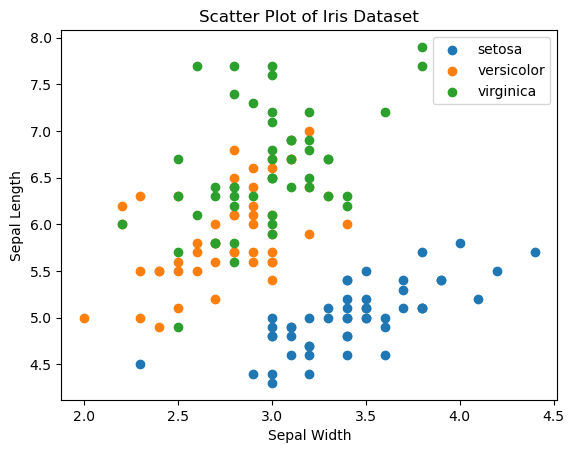

In [12]:
sepal_width = df['sepal width (cm)']
sepal_length = df['sepal length (cm)']

species = df['species']

plot_iris(sepal_width, sepal_length, species)

In [13]:
x = iris.data[:, [0, 1]]
y = iris.target

y1_binary = np.where(y == 0, 1, -1)
x1_target_specie = x[y == 0]
x1_other_species = x[y != 0]

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
class Adaline:

    def __init__(self, learning_rate = 0.01, epochs = 64):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, x_train, y_train):

        self.weights = np.zeros(1 + x_train.shape[1])                        
        self.costs = []

        for i in range(self.epochs):   
            y_pred = self.predict(x_train)
            errors = y_train - y_pred        
            self.weights[1:] += self.lr * x_train.T.dot(errors)
            self.weights[0] += self.lr * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.costs.append(cost)

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [16]:
def plot_decision_regions(model, specie_name, x_axis, x_target_specie, x_other_species, resolution):

    plt.scatter(x_target_specie[:, 0], x_target_specie[:, 1], color='red', marker='o', label=specie_name)
    plt.scatter(x_other_species[:, 0], x_other_species[:, 1], color='blue', marker='x', label='other species')
    plt.xlabel('sepal length [cm]')
    plt.ylabel('sepal width [cm]')
    plt.legend(loc='upper left')

    x1_axix_min, x1_axis_max = x_axis[:, 0].min() - 1, x_axis[:, 0].max() + 1
    x2_axis_min, x2_axis_max = x_axis[:, 1].min() - 1, x_axis[:, 1].max() + 1

    x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_axix_min, x1_axis_max, resolution),
                            np.arange(x2_axis_min, x2_axis_max, resolution))
    
    Z = model.predict(np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T)
    Z = Z.reshape(x1_mesh.shape)

    plt.contourf(x1_mesh, x2_mesh, Z, alpha=0.3, cmap='coolwarm')
    plt.xlim(x1_mesh.min(), x1_mesh.max())
    plt.ylim(x2_mesh.min(), x2_mesh.max())

    plt.title(f'Adaline - {specie_name} vs. Others')
    plt.show()

In [17]:
def plot_error(costs):
        plt.plot(range(1, len(costs) + 1), costs)
        plt.xlabel('Epoch')
        plt.ylabel('Sum Squared Error')
        plt.title('Prediction Error during Learning')
        plt.grid()
        plt.show()

In [18]:
ada = Adaline(learning_rate=0.001, epochs=64)

ada.fit(x, y1_binary)

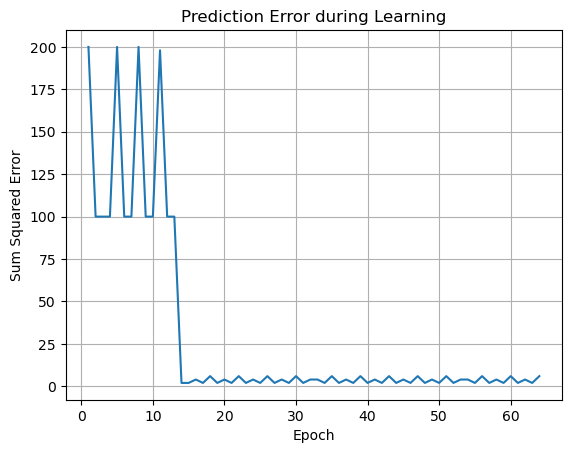

In [19]:
plot_error(ada.costs)

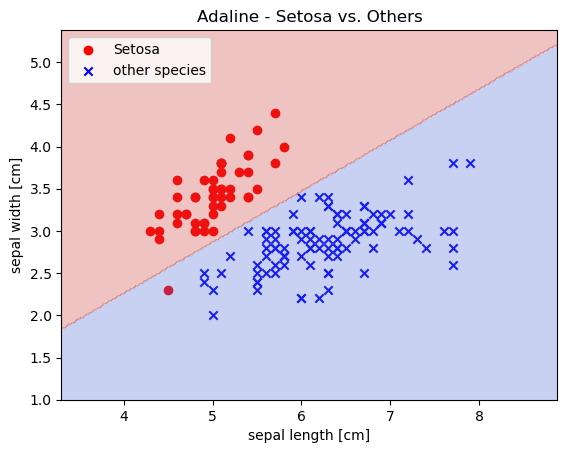

In [20]:
plot_decision_regions(ada, 'Setosa', x, x1_target_specie, x1_other_species, 0.02)

In [21]:
y2_binary = np.where(y == 1, 1, -1)
x2_target_specie = x[y == 1]
x2_other_species = x[y != 1]

In [22]:
ada.fit(x, y2_binary)

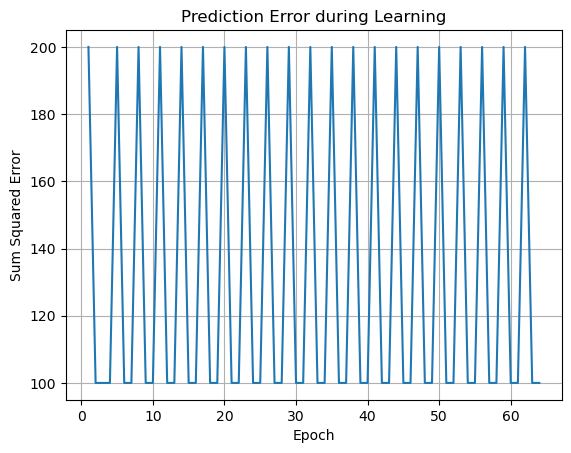

In [23]:
plot_error(ada.costs)

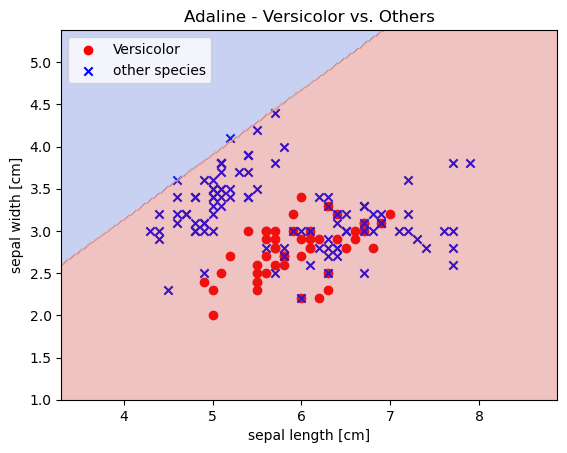

In [24]:
plot_decision_regions(ada, 'Versicolor', x, x2_target_specie, x2_other_species, 0.02)

As you can see, Adaline cannot split the Versicolor species from other species as well as it can split the Setosa species from other species because the Versicolor species is not as linearly separable as the Setosa species. This means that the boundary between the Versicolor species and the other species is not as clear-cut as the boundary between the Setosa species and the other species.

## Part 2

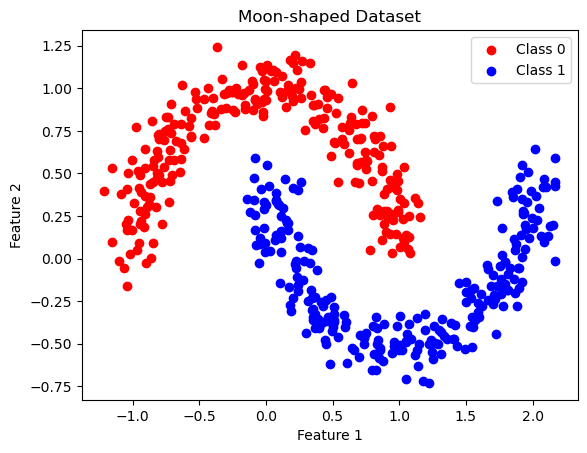

In [44]:
X_moons, Y_moons = make_moons(n_samples=500, noise=0.1, random_state=42)
X_train_moons, X_test_moons, Y_train_moons, Y_test_moons = train_test_split(X_moons, Y_moons, 
                                                                            test_size=0.5, random_state=3)

plt.scatter(X_moons[Y_moons == 0][:, 0], X_moons[Y_moons == 0][:, 1], color='red', label='Class 0')

plt.scatter(X_moons[Y_moons == 1][:, 0], X_moons[Y_moons == 1][:, 1], color='blue', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Moon-shaped Dataset")
plt.show()

In [45]:
Y_train_moons

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0])

In [46]:
Y_train_moons[Y_train_moons == 0] = -1


In [49]:
Y_test_moons[Y_test_moons == 0] = -1

In [36]:
X_train_moons.shape

(250, 2)

In [94]:
class MadalineMRI:

    def __init__(self, num_l, weights_threshold=0.0001, epochs=500, learning_rate = 0.1):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights_threshold = weights_threshold

        self.w = np.random.rand(num_l, 2)
        self.v = [1 / num_l] * num_l
        self.b1 = np.random.rand(num_l, 1)
        self.b2 = (num_l - 1) / num_l

    def fit(self, X, Y):
        count = 0
        self.costs = []

        for epoch in range(self.epochs):
            old_weights = deepcopy(self.w)

            for x, label in zip(X, Y):
                z_in = np.array([np.matmul(x, self.w.T)]).T + self.b1
                z = np.heaviside(z_in, 1) * 2 - 1

                y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
                y = np.heaviside(y_in, 1) * 2 - 1

                if y != label:
                    if label == 1:
                        z_j = np.max(z_in)
                        ind = np.where(z_in == z_j)

                        self.w[ind, :] = self.w[ind, :] + self.learning_rate * (1 - z_in[ind]) * np.array(x)
                        self.b1[ind] = self.b1[ind] + self.learning_rate * (1 - z_in[ind])
                    else:
                        ind = [i for i, x in enumerate(z_in) if x > 0]
                        for indice in ind:
                            self.w[indice, :] = self.w[indice, :] + self.learning_rate * (
                                    -1 - z_in[indice]) * np.array(x)
                            self.b1[indice] = self.b1[indice] + self.learning_rate * (-1 - z_in[indice])


            self.costs.append(self.calc_error(self.predict(X), Y))

            if np.all((self.w - old_weights) < self.weights_threshold) and epoch > 10:
                count += 1
                if count > 10:
                    break

        print("Madaline with", len(self.b1), "neurons in hidden layer")

    def predict(self, X):
        y = []

        for x in X:
            z_in = np.array([np.matmul(x, self.w.T)]).T + self.b1
            z = np.heaviside(z_in, 1) * 2 - 1
            y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
            y.append(np.heaviside(y_in, 1) * 2 - 1)

        return y

    def calc_error(self, net, t):
        self.err = ((t - net) ** 2).sum() / 2.
        return self.err


Madaline with 3 neurons in hidden layer
Accuracy of prediction is: 0.892


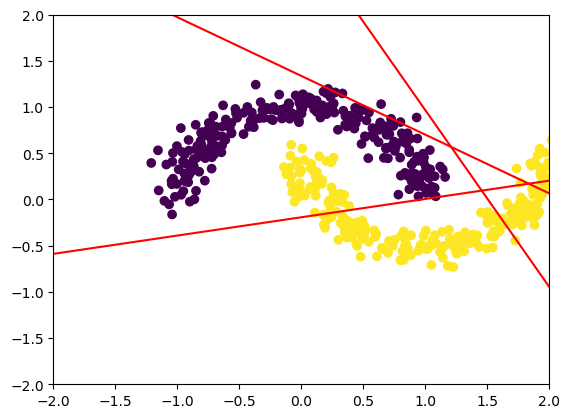

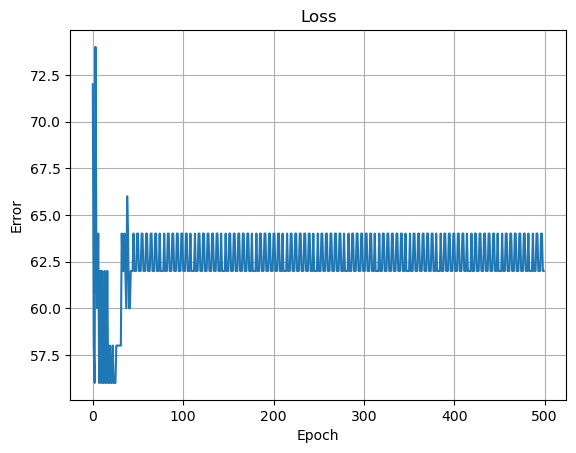

Madaline with 5 neurons in hidden layer
Accuracy of prediction is: 0.876


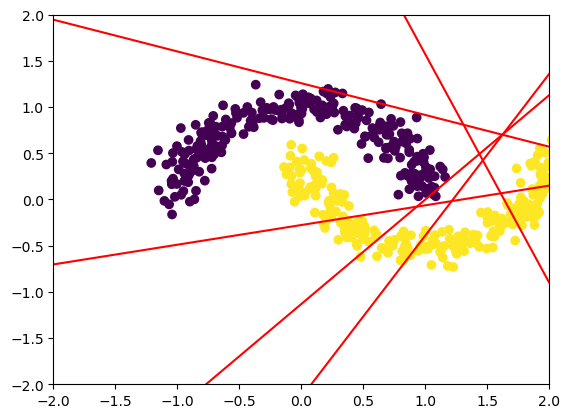

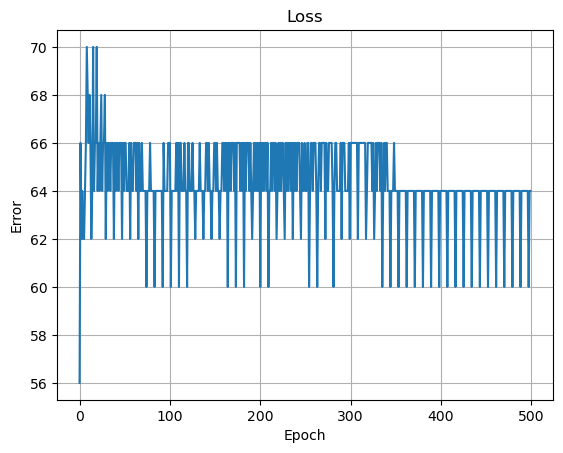

Madaline with 8 neurons in hidden layer
Accuracy of prediction is: 0.896


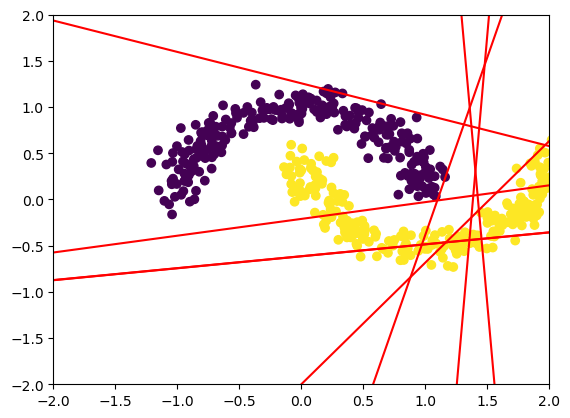

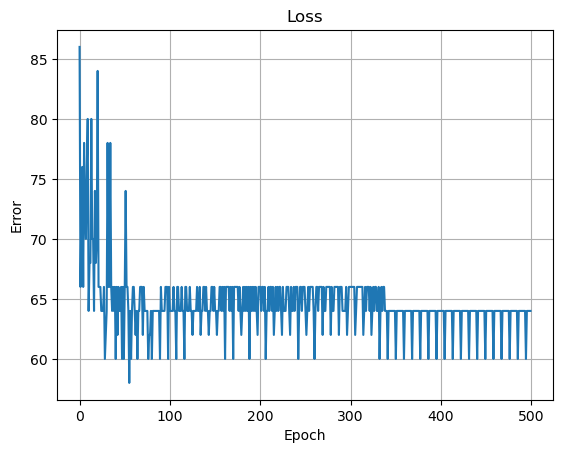

In [96]:
neuron_counts = [3, 5, 8]   #number of hidden layer neurons

for i in range(3):
    #define madaline with different number of hidden layer neurons
    madaline = MadalineMRI(neuron_counts[i], weights_threshold=10**(-8), epochs=500, learning_rate=0.1)

    #fit madaline on x_train and y_train
    madaline.fit(X_train_moons, Y_train_moons)

    #predict x_test with madaline model
    pred = madaline.predict(X_test_moons)

    #madaline model accuracy
    acc = accuracy_score(pred, Y_test_moons)
    print("Accuracy of prediction is:", acc)
    #plot lines and errors of madaline models
    for i in range(neuron_counts[i]):
        plt.axline((0, float(-madaline.b1[i] / madaline.w[i][1])), slope=-madaline.w[i][0] / madaline.w[i][1], color="r")

    plt.scatter(X_moons[:, 0], X_moons[:, 1], c = Y_moons.reshape(-1))
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.show()

    plt.plot(madaline.costs)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.grid()
    plt.show()


# Question 4

In [185]:
mnist = ks.datasets.mnist

(X_train_mnist, Y_train_mnist), (X_test_mnist, Y_test_mnist) = mnist.load_data()

In [186]:
print(f'X_train shape is: {X_train_mnist.shape}')
print(f'Y_train shape is: {Y_train_mnist.shape}')
print(f'X_test shape is: {X_test_mnist.shape}')
print(f'Y_test shape is: {Y_test_mnist.shape}')

X_train shape is: (60000, 28, 28)
Y_train shape is: (60000,)
X_test shape is: (10000, 28, 28)
Y_test shape is: (10000,)


In [187]:
print(f'Train data count is: {X_train_mnist.shape[0]}')
print(f'Test data count is: {X_test_mnist.shape[0]}')

Train data count is: 60000
Test data count is: 10000


First off, let's see how many classes exist in MNIST dataset:

In [188]:
classes_count = len(set(Y_train_mnist))
print(f'There are {classes_count} classes in MNIST dataset.')

There are 10 classes in MNIST dataset.


In [189]:
def display_class_samples(classes_count):
    samples = []

    for i in range(classes_count):
        # select the first element of each class
        ind = np.where(Y_train_mnist == i)[0][0]

        image = X_train_mnist[ind]
        label = Y_train_mnist[ind]

        samples.append((image, label))

    _, axes = plt.subplots(1, classes_count, figsize=(12, 3))

    for i, (image, label) in enumerate(samples):
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Class: {label}')
        axes[i].axis('off')

    plt.show()

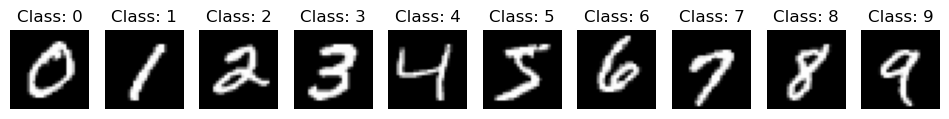

In [190]:
display_class_samples(classes_count)

Now, you can see a sample from each calss.

In [191]:
def plot_samples_count():
    class_counts = {}

    for label in Y_train_mnist:
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1

    classes = sorted(class_counts.keys())

    colors = plt.cm.rainbow(np.linspace(0, 1, len(classes)))

    plt.bar(classes, class_counts.values(), color=colors)
    plt.xlabel('Class', color='b')
    plt.ylabel('Sample Count', color='b')
    plt.title('Samples Count for Each Class in MNIST Train Dataset', color='g')
    plt.xticks(classes)
    plt.show()


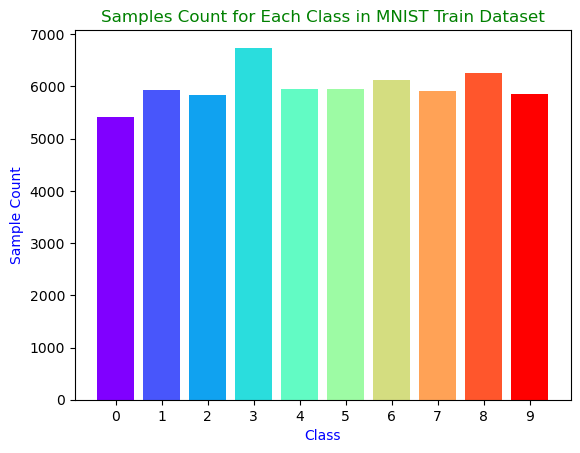

In [192]:
plot_samples_count()

To apply min-max normalization, we first need to flatten images.

In [193]:
X_train_flatten = X_train_mnist.reshape(X_train_mnist.shape[0], -1)
X_test_flatten = X_test_mnist.reshape(X_test_mnist.shape[0], -1)

scaler = MinMaxScaler()
scaler.fit(X_train_flatten)

X_train_normalized = scaler.transform(X_train_flatten)
X_test_normalized = scaler.transform(X_test_flatten)

In [194]:
np.max(X_train_normalized)

1.0

In [195]:
np.min(X_train_normalized)

0.0

## Part 2

In [196]:
X_train_mnist = X_train_mnist / 255.0
X_test_mnist = X_test_mnist / 255.0

In [197]:
teacher = Sequential()

teacher.add(Flatten(input_shape=(28, 28))) # Flatten layer
teacher.add(Dense(1024, activation='relu')) # First hidden layer
teacher.add(Dense(512, activation='relu')) # Second hidden layer
teacher.add(Dense(10, activation='linear')) # Output layer

In [198]:
teacher_loss = ks.losses.SparseCategoricalCrossentropy(from_logits=True)
teacher_optimizer = SGD(learning_rate=0.01)

teacher.compile(optimizer=teacher_optimizer, loss=teacher_loss, metrics=['accuracy'])

teacher_history = teacher.fit(X_train_mnist, Y_train_mnist, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5338 - accuracy: 0.8681
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2616 - accuracy: 0.9258
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2111 - accuracy: 0.9399
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1774 - accuracy: 0.9499
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1527 - accuracy: 0.9572
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1336 - accuracy: 0.9628
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1187 - accuracy: 0.9671
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1060 - accuracy: 0.9703
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0954 - accuracy: 0.9735
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.086

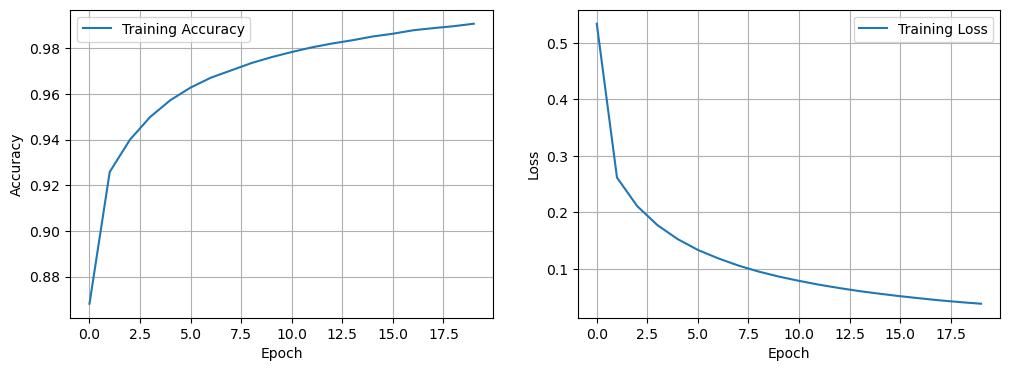

In [199]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(teacher_history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(teacher_history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [220]:
test_loss, test_accuracy = teacher.evaluate(X_test_mnist, Y_test_mnist)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Y_pred_teacher = teacher.predict(X_test_mnist).argmax(axis=1)

misclassified_indices = np.where(Y_pred_teacher != Y_test_mnist)
misclassified_count = len(misclassified_indices[0])

print(f"Misclassified Count: {misclassified_count}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0719 - accuracy: 0.9777
Test Loss: 0.0719
Test Accuracy: 0.9777
313/313 [==============================] - 0s 1ms/step
Misclassified Count: 223


In [221]:
student1 = Sequential()

student1.add(Flatten(input_shape=(28, 28)))
student1.add(Dense(128 ,activation='relu'))
student1.add(Dense(64, activation='relu'))
student1.add(Dense(10, activation='linear'))

In [222]:
student1_loss = ks.losses.SparseCategoricalCrossentropy(from_logits=True)
student1_optimizer = SGD(learning_rate=0.01)

student1.compile(loss=student1_loss, optimizer=student1_optimizer, metrics=['accuracy'])

student1_history = student1.fit(X_train_mnist, Y_train_mnist, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 841us/step - loss: 0.6238 - accuracy: 0.8352
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2941 - accuracy: 0.9159
Epoch 3/10
1875/1875 [==============================] - 2s 859us/step - loss: 0.2427 - accuracy: 0.9304
Epoch 4/10
1875/1875 [==============================] - 2s 822us/step - loss: 0.2098 - accuracy: 0.9396
Epoch 5/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.1849 - accuracy: 0.9468
Epoch 6/10
1875/1875 [==============================] - 2s 850us/step - loss: 0.1661 - accuracy: 0.9526
Epoch 7/10
1875/1875 [==============================] - 2s 804us/step - loss: 0.1502 - accuracy: 0.9573
Epoch 8/10
1875/1875 [==============================] - 2s 812us/step - loss: 0.1376 - accuracy: 0.9608
Epoch 9/10
1875/1875 [==============================] - 2s 983us/step - loss: 0.1264 - accuracy: 0.9640
Epoch 10/10
1875/1875 [==============================] - 2s 823us/

In [223]:
Y_pred_student1 = student1.predict(X_test_mnist).argmax(axis=1)

misclassified_indices = np.where(Y_pred_student1 != Y_test_mnist)
misclassified_count = len(misclassified_indices[0])

print(f"Misclassified Count: {misclassified_count}")

313/313 [==============================] - 0s 547us/step
Misclassified Count: 356


In [224]:
teacher_logits = teacher(X_train_mnist)

2023-11-06 06:53:56.750837: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.


In [225]:
student2 = Sequential()

student2.add(Flatten(input_shape=(28, 28)))
student2.add(Dense(128 ,activation='relu'))
student2.add(Dense(64, activation='relu'))
student2.add(Dense(10, activation='linear'))

In [226]:
student2_loss = ks.losses.MeanSquaredError()
student2_optimizer = SGD(learning_rate=0.01)

student2.compile(loss=student2_loss, optimizer=student2_optimizer, metrics=['accuracy'])

student2_history = student2.fit(X_train_mnist, teacher_logits, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 783us/step - loss: 2.7628 - accuracy: 0.8988
Epoch 2/10
1875/1875 [==============================] - 1s 795us/step - loss: 0.6123 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 2s 810us/step - loss: 0.4262 - accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 1s 797us/step - loss: 0.3461 - accuracy: 0.9789
Epoch 5/10
1875/1875 [==============================] - 2s 801us/step - loss: 0.3004 - accuracy: 0.9810
Epoch 6/10
1875/1875 [==============================] - 1s 794us/step - loss: 0.2717 - accuracy: 0.9824
Epoch 7/10
1875/1875 [==============================] - 2s 801us/step - loss: 0.2495 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 2s 912us/step - loss: 0.2345 - accuracy: 0.9844
Epoch 9/10
1875/1875 [==============================] - 1s 792us/step - loss: 0.2212 - accuracy: 0.9848
Epoch 10/10
1875/1875 [==============================] - 2s 805u

In [227]:
Y_pred_student2 = student2.predict(X_test_mnist).argmax(axis=1)

misclassified_indices = np.where(Y_pred_student2 != Y_test_mnist)
misclassified_count = len(misclassified_indices[0])

print(f"Misclassified Count: {misclassified_count}")

313/313 [==============================] - 0s 564us/step
Misclassified Count: 268


As you can observe, knowledge distillation has happened! Because student2 has a better performance and its misclassified labels has been decreased compared to student1.

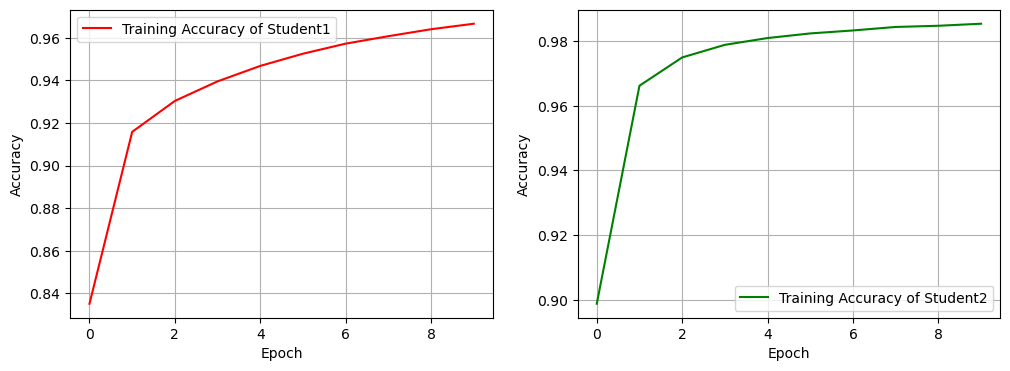

In [230]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(student1_history.history['accuracy'], label='Training Accuracy of Student1', color='r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(student2_history.history['accuracy'], label='Training Accuracy of Student2', color='g')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()